# Long-running studies

## Goal
Real-world __syftr__ studies take long time to run: data embedding, LLM inference and evaluation take up quite a lot time. However, study configs have some settings that can help allocating more resources to studies to make them run faster. In this tutorial, we will show how to stop and resume running studies with more resouces provided.

Let's use the example study from welcome example.

In [1]:
from syftr import api
from syftr.configuration import cfg

example_study = api.Study.from_file(cfg.paths.studies_dir / "example-dr-docs.yaml")
example_study

Study(name=example-dr-docs, remote=False)

As far as we remember a `Study` object has `run()` method that is used to start study. Let's use it.

In [2]:
example_study.run()

2025-05-21 13:46:02,577	INFO client_builder.py:244 -- Passing the following kwargs to ray.init() on the server: log_to_driver
SIGTERM handler is not set because current thread is not the main thread.
2025-05-21 13:46:04,606	INFO dashboard_sdk.py:338 -- Uploading package gcs://_ray_pkg_5299804ff019d2aa.zip.
2025-05-21 13:46:04,607	INFO packaging.py:600 -- Creating a file package for local module '/home/stefan/workspace/syftr/ray_working_dir'.
2025-05-21 13:46:04,713	INFO dashboard_sdk.py:385 -- Package gcs://_ray_pkg_3c937137b1347739.zip already exists, skipping upload.


However, after some time we notice that study is running slower than we expected. It happens, because the concurrency parameters like `cpus_per_trial` in the config file are set rather conservatively. But it is not a problem, since we can update them.
Let's pause the study first.

In [3]:
example_study.stop()

[I 2025-05-15 16:10:32,258] Connecting to Ray job submission client at `http://127.0.0.1:8265`
INFO:syftr:Connecting to Ray job submission client at `http://127.0.0.1:8265`
[W 2025-05-15 16:10:32,274] Using existing ray client with address 'None'


Then we can update the parameter and resume the study:

In [4]:
example_study.study_config.optimization.cpus_per_trial = 2

In [5]:
example_study.resume()

[I 2025-05-15 16:10:35,105] Connecting to Ray job submission client at `http://127.0.0.1:8265`
INFO:syftr:Connecting to Ray job submission client at `http://127.0.0.1:8265`
[W 2025-05-15 16:10:35,117] Using existing ray client with address 'None'
[I 2025-05-15 16:10:35,168] Submitting job to local Ray instance
INFO:syftr:Submitting job to local Ray instance
2025-05-15 16:10:35,177	INFO dashboard_sdk.py:385 -- Package gcs://_ray_pkg_d757fa588ad17a75.zip already exists, skipping upload.
2025-05-15 16:10:35,272	INFO dashboard_sdk.py:385 -- Package gcs://_ray_pkg_d63bb66db227b656.zip already exists, skipping upload.
2025-05-15 16:10:35,543	INFO dashboard_sdk.py:385 -- Package gcs://_ray_pkg_7880133cf6eb922c.zip already exists, skipping upload.


After the resume, we realized that it is not enough and we want to update another parameter, `max_concurrent_trials` which sets the limit for max number of trials running concurrently on the cluster. Let's update it and resume the study.

In [6]:
example_study.stop()

[I 2025-05-15 16:10:36,909] Connecting to Ray job submission client at `http://127.0.0.1:8265`
INFO:syftr:Connecting to Ray job submission client at `http://127.0.0.1:8265`
[W 2025-05-15 16:10:36,921] Using existing ray client with address 'None'


In [7]:
example_study.study_config.optimization.max_concurrent_trials = 12

In [8]:
example_study.resume()

[I 2025-05-15 16:10:38,328] Connecting to Ray job submission client at `http://127.0.0.1:8265`
INFO:syftr:Connecting to Ray job submission client at `http://127.0.0.1:8265`
[W 2025-05-15 16:10:38,340] Using existing ray client with address 'None'
[I 2025-05-15 16:10:38,390] Submitting job to local Ray instance
INFO:syftr:Submitting job to local Ray instance
2025-05-15 16:10:38,399	INFO dashboard_sdk.py:385 -- Package gcs://_ray_pkg_d757fa588ad17a75.zip already exists, skipping upload.
2025-05-15 16:10:38,494	INFO dashboard_sdk.py:385 -- Package gcs://_ray_pkg_d63bb66db227b656.zip already exists, skipping upload.
2025-05-15 16:10:38,760	INFO dashboard_sdk.py:385 -- Package gcs://_ray_pkg_7880133cf6eb922c.zip already exists, skipping upload.


After the resume, we should notice that study runs much faster. 
As we mentioned before, a study object has wait_for_completion() method that can be used to block execution until a study completes, but since we are in the Jupyter environment using it is not necessary.
Let's wait until the study completes.

In [ ]:
# example_study.wait_for_completion()

Voila, the study's Pareto front is avaliable!

Loading Studies: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 96.26it/s]


data has 10 rows

Running: create_study_stats_table
Running: create_exceptions_stats_table
Running: pareto_plot_and_table
data has 10 rows
Running: generate_trial_description_table
data has 2 rows
data has 10 rows
Running: style_pareto_table


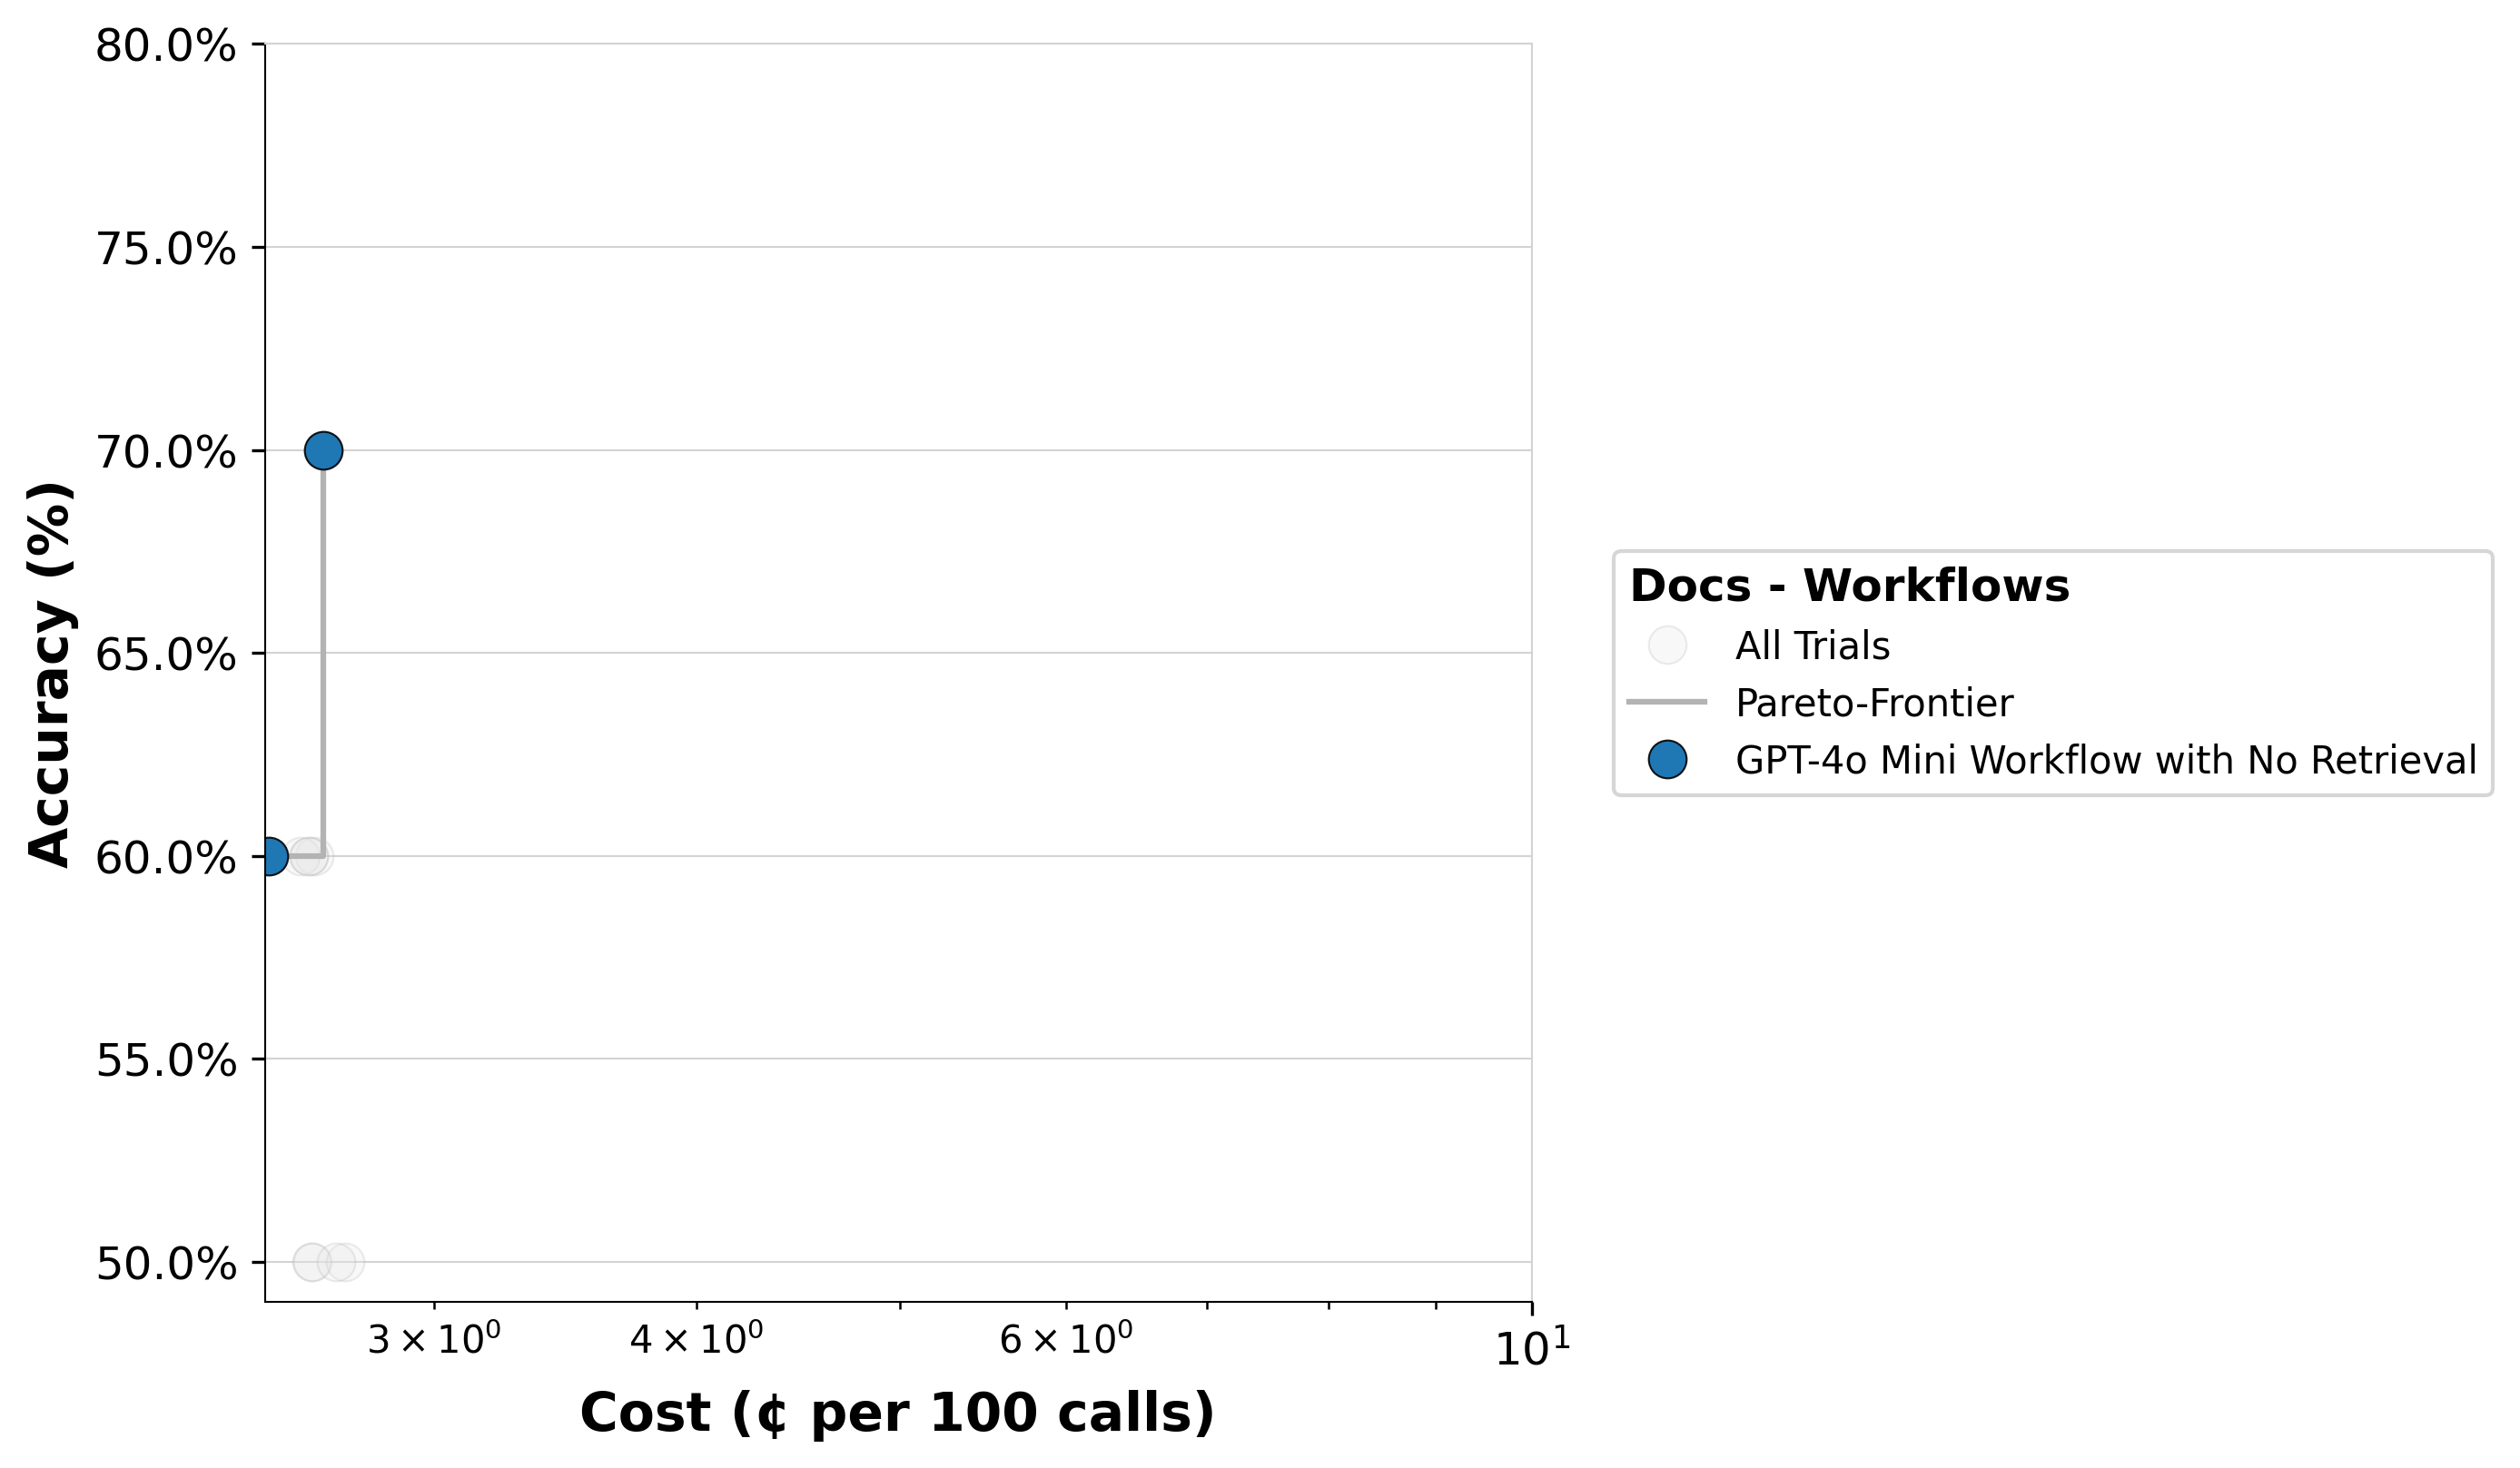

In [9]:
example_study.plot_pareto()